# End-to-end Machine Learning project

The best way to learning any programming language or new concept is to do hands-on on that. Let's start with buidling machine learning model

## Problem Statement




## Dataset



It is located at `/home/senstar092304/BootML/Datasets/Central_Jersey_Home_Price_1/`

# Get the data

In [2]:
import pandas as pd
import os

DATASET_PATH = '/home/senstar092304/BootML/Datasets/Central_Jersey_Home_Price_1/'
def load_dataset_data(dataset_path=DATASET_PATH): 
    csv_path = os.path.join(dataset_path, "Zillow_Cenrtal_NJ_Home_Sale_Price.csv") 
    return pd.read_csv(csv_path)

In [3]:
Central_Jersey_Home_Price = load_dataset_data()
Central_Jersey_Home_Price.head()

,Last Date Sold,Latitude,Longitude,Zip,Price,Price Per Sq. Ft.,Footage,Lot Area,Beds,Baths,...,Property Condition,Roof Type,Virtual Tour,MLS Source,Parcel Id,Favorite Count,Page Views,Tax Paid (Most Recent),Has Private Pool,Pool Features
0,06/03/2021,40.284607,-74.606155,8550,1040000,264.0,3940.0,46173.60,5,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/2021,40.272766,-74.584250,8550,525000,236.0,2222.0,15002.06,2,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/04/2021,40.352020,-74.581150,8536,585000,272.0,2154.0,14374.80,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/04/2021,40.330063,-74.614570,8536,876000,NaN,NaN,33541.20,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/04/2021,40.287514,-74.596250,8550,1210000,325.0,3720.0,37026.00,5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The relevant attributes in Zillow_Cenrtal_NJ_Home_Sale_Price.csv are : 

Last Date Sold, Latitude, Longitude, Zip, Price, Price Per Sq. Ft., Lot Area, Lot Area Units, Beds, Baths, Footage, Address, Zestimate, Days on the Market (For Sale), Year Built, Stories, Heating, Cooling, Fireplaces, Flooring, Foundation, Garage Capacity, Sewer, Subdivision, Zoning Desc., Property Condition, Roof Type, 



## Let's dop the irrelevant fields from our file


In [4]:
for x in ['Listing URL','Short Address','City','State','Raw Property Details','Date Scraped','Broker Name','Status','Type','Raw Rent Details','Lowest Rent','Highest Rent','Rent Zestimate','Tax Assessed Value (Most Recent)','Date Price Last Changed','Price Change','Currency','Most Recent Date Listed for Sale','Days on Zillow','MLS Id','Broker Phone','Listed By','Lister Phone','Agent Name','Agent Phone','Agent Email','Co-Agent Name','Co-Agent Phone','Buyer Agent Fee','Association Name','Association Fee','Monthly HOA Fees','Virtual Tour','MLS Source','Parcel Id','Favorite Count','Page Views','Tax Paid (Most Recent)','Has Private Pool','Pool Features', 'Days on the Market (For Sale)','Year Built','Stories','Heating','Cooling','Fireplaces','Flooring','Foundation','Garage Capacity','Sewer','Subdivision','Zoning Desc.','Property Condition','Roof Type']:
    Central_Jersey_Home_Price = Central_Jersey_Home_Price.drop(x,axis=1)

In [5]:
Central_Jersey_Home_Price.head()

,Last Date Sold,Latitude,Longitude,Zip,Price,Price Per Sq. Ft.,Footage,Lot Area,Beds,Baths,Address,Zestimate
0,06/03/2021,40.284607,-74.606155,8550,1040000,264.0,3940.0,46173.60,5,5.0,"4 Lee Ct, Princeton Junction, NJ 08550",1422100.0
1,06/03/2021,40.272766,-74.584250,8550,525000,236.0,2222.0,15002.06,2,3.0,"87 Honeyflower Ln, West Windsor, NJ 08550",649100.0
2,06/04/2021,40.352020,-74.581150,8536,585000,272.0,2154.0,14374.80,3,3.0,"50 Parker Rd, Plainsboro, NJ 08536",827000.0
3,06/04/2021,40.330063,-74.614570,8536,876000,NaN,NaN,33541.20,4,4.0,"6 Birch Dr, Plainsboro, NJ 08536",1200100.0
4,06/04/2021,40.287514,-74.596250,8550,1210000,325.0,3720.0,37026.00,5,4.0,"4 Cliffview Ct, West Windsor, NJ 08550",1527900.0


## Know your data

In [6]:
# The info() method is useful to get a quick description of the data
# in particular the total number of rows,
# and each attribute’s type and number of non-null values

Central_Jersey_Home_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4122 entries, 0 to 4121
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Last Date Sold     4122 non-null   object 
 1   Latitude           4122 non-null   float64
 2   Longitude          4122 non-null   float64
 3   Zip                4122 non-null   int64  
 4   Price              4122 non-null   int64  
 5   Price Per Sq. Ft.  3082 non-null   float64
 6   Footage            3082 non-null   float64
 7   Lot Area           4009 non-null   float64
 8   Beds               4122 non-null   int64  
 9   Baths              3758 non-null   float64
 10  Address            4122 non-null   object 
 11  Zestimate          4018 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 386.6+ KB


In [7]:
# Find out what categories exist for the categorical fields by using the value_counts() method
# And let's drop the rows which has missing categoical value

for x in ['Zip']:
    Central_Jersey_Home_Price.dropna(subset=[x], how='all', inplace = True)
    print (x)
    print (Central_Jersey_Home_Price[x].value_counts())

Zip
8816    814
8820    810
8817    808
8550    539
8840    509
8852    306
8536    260
8540     76
Name: Zip, dtype: int64


In [8]:
Central_Jersey_Home_Price.head()

,Last Date Sold,Latitude,Longitude,Zip,Price,Price Per Sq. Ft.,Footage,Lot Area,Beds,Baths,Address,Zestimate
0,06/03/2021,40.284607,-74.606155,8550,1040000,264.0,3940.0,46173.60,5,5.0,"4 Lee Ct, Princeton Junction, NJ 08550",1422100.0
1,06/03/2021,40.272766,-74.584250,8550,525000,236.0,2222.0,15002.06,2,3.0,"87 Honeyflower Ln, West Windsor, NJ 08550",649100.0
2,06/04/2021,40.352020,-74.581150,8536,585000,272.0,2154.0,14374.80,3,3.0,"50 Parker Rd, Plainsboro, NJ 08536",827000.0
3,06/04/2021,40.330063,-74.614570,8536,876000,NaN,NaN,33541.20,4,4.0,"6 Birch Dr, Plainsboro, NJ 08536",1200100.0
4,06/04/2021,40.287514,-74.596250,8550,1210000,325.0,3720.0,37026.00,5,4.0,"4 Cliffview Ct, West Windsor, NJ 08550",1527900.0


In [9]:
# Let's look at the numerical fields.
# The describe() method shows a summary of the numerical attributes

Central_Jersey_Home_Price.describe()

,Latitude,Longitude,Zip,Price,Price Per Sq. Ft.,Footage,Lot Area,Beds,Baths,Zestimate
count,4122.000000,4122.000000,4122.000000,4.122000e+03,3082.000000,3082.000000,4.009000e+03,4122.000000,3758.000000,4.018000e+03
mean,40.459232,-74.441894,8765.085395,6.813257e+05,687.451006,2283.871188,1.806904e+05,3.500728,2.839955,8.145295e+05
std,0.101060,0.098756,114.819145,4.113795e+05,14599.918726,983.484348,4.817585e+06,1.396645,1.079474,3.478791e+05
min,40.243797,-74.670670,8536.000000,7.500000e+04,28.000000,1.000000,2.500000e-01,0.000000,1.000000,2.100000e+03
25%,40.386895,-74.551024,8816.000000,4.800000e+05,268.000000,1532.000000,1.289000e+03,3.000000,2.000000,5.889250e+05
50%,40.499468,-74.399470,8817.000000,6.377500e+05,308.000000,2189.000000,1.099890e+04,4.000000,3.000000,7.643000e+05
75%,40.545916,-74.368879,8820.000000,8.197688e+05,353.000000,2800.000000,2.003760e+04,4.000000,3.000000,9.639500e+05
max,40.605064,-74.319600,8852.000000,1.700000e+07,577000.000000,10000.000000,2.530836e+08,8.000000,9.000000,1.049620e+07


In [10]:
Central_Jersey_Home_Price['Last Date Sold'] = Central_Jersey_Home_Price['Last Date Sold'].astype('datetime64[ns]')


The count, mean, min and max rows are self-explanatory.

**std** rows shows the standard deviation (which measures how dispersed the values are)

** 25%, 50%, 75% ** shows the corresponding percentiles

** Points to Note**

1. ** 25th percentile is called 1st quartile ** 
2. ** 50th percentile is called median ** 
3. ** 75th percentile is called 3rd quartile ** 

## Plot histogram

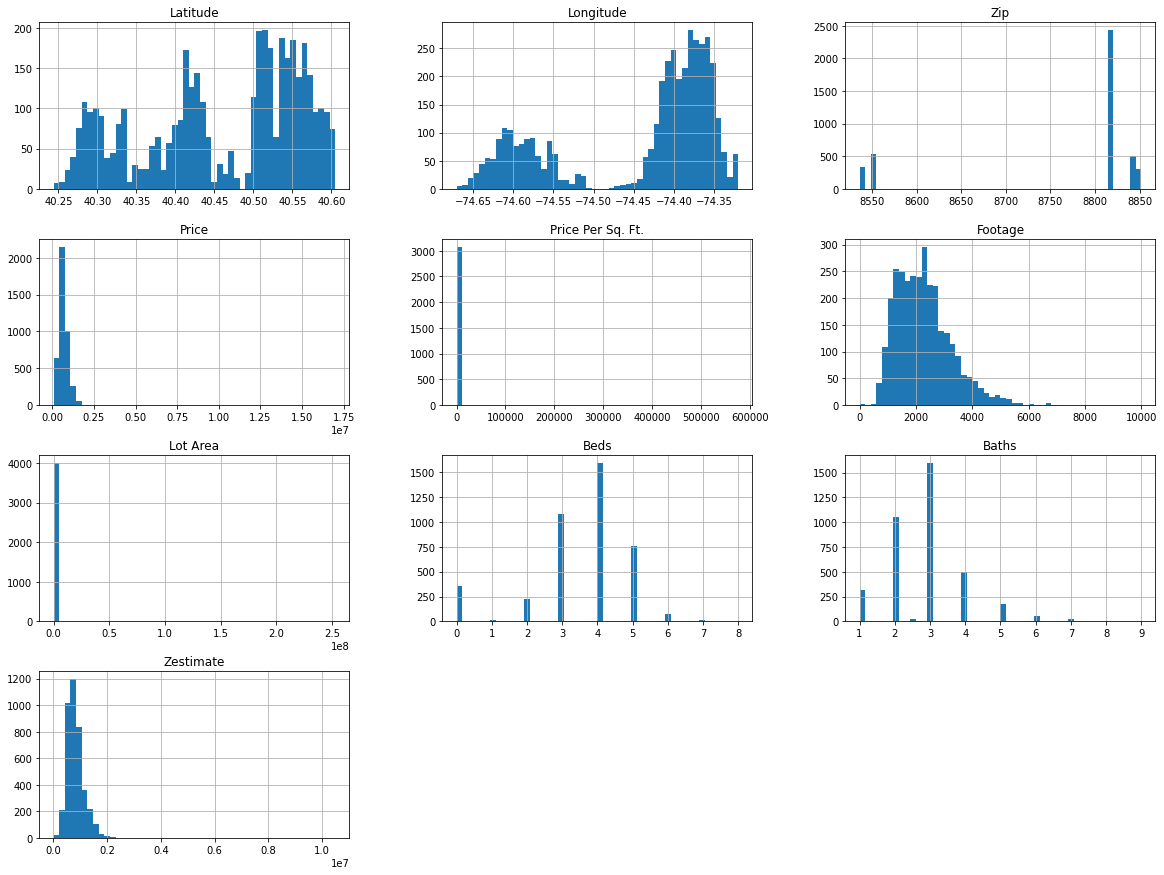

In [11]:
# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres

%matplotlib inline
import matplotlib.pyplot as plt
Central_Jersey_Home_Price.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
print(Central_Jersey_Home_Price.columns)

Index(['Last Date Sold', 'Latitude', 'Longitude', 'Zip', 'Price',
       'Price Per Sq. Ft.', 'Footage', 'Lot Area', 'Beds', 'Baths', 'Address',
       'Zestimate'],
      dtype='object')


In [13]:
for x in ['Latitude', 'Longitude']:
    Central_Jersey_Home_Price = Central_Jersey_Home_Price.drop(x,axis=1)
Central_Jersey_Home_Price.head()

,Last Date Sold,Zip,Price,Price Per Sq. Ft.,Footage,Lot Area,Beds,Baths,Address,Zestimate
0,2021-06-03,8550,1040000,264.0,3940.0,46173.60,5,5.0,"4 Lee Ct, Princeton Junction, NJ 08550",1422100.0
1,2021-06-03,8550,525000,236.0,2222.0,15002.06,2,3.0,"87 Honeyflower Ln, West Windsor, NJ 08550",649100.0
2,2021-06-04,8536,585000,272.0,2154.0,14374.80,3,3.0,"50 Parker Rd, Plainsboro, NJ 08536",827000.0
3,2021-06-04,8536,876000,NaN,NaN,33541.20,4,4.0,"6 Birch Dr, Plainsboro, NJ 08536",1200100.0
4,2021-06-04,8550,1210000,325.0,3720.0,37026.00,5,4.0,"4 Cliffview Ct, West Windsor, NJ 08550",1527900.0


## Split dataset into test and training set

In [14]:
# To make this notebook's output identical at every run

import numpy as np

np.random.seed(42)

In [15]:
# With sklearn train_test_split

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Central_Jersey_Home_Price, test_size=0.2, random_state=42)

print ("Length of train set is", len(train_set))
print ("Length of test set is", len(test_set))


Length of train set is 3297
Length of test set is 825


In [16]:
Central_Jersey_Home_Price = train_set.copy()
Central_Jersey_Home_Price.head()

,Last Date Sold,Zip,Price,Price Per Sq. Ft.,Footage,Lot Area,Beds,Baths,Address,Zestimate
1146,2022-05-09,8540,590000,265.0,2228.0,13198.68,3,2.05,"14 Heath Ct, Princeton, NJ 08540",740800.0
2984,2023-07-17,8550,950000,371.0,2560.0,0.70,4,3.00,"12 Springhill Dr, West Windsor, NJ 08550",1024600.0
3888,2024-03-28,8817,486000,264.0,1840.0,9121.00,3,2.00,"35 Cambridge Rd, Edison, NJ 08817",567100.0
2825,2023-06-12,8816,715000,285.0,2506.0,0.42,4,3.00,"333 Dunhams Corner Rd, East Brunswick, NJ 08816",812100.0
1921,2022-09-27,8820,861000,343.0,2511.0,14849.60,4,3.00,"12 Alexis Ln, Edison, NJ 08820",1001400.0


# Discover and visualize the data to gain insights

In [17]:
#Central_Jersey_Home_Price.plot(kind="scatter", x="Latitude", y="Longitude", alpha=0.2)

# Generate correlations

In [18]:
corr_matrix = Central_Jersey_Home_Price.corr()
corr_matrix

,Zip,Price,Price Per Sq. Ft.,Footage,Lot Area,Beds,Baths,Zestimate
Zip,1.000000,-0.255347,0.014903,-0.307144,0.009435,-0.109799,-0.194054,-0.267152
Price,-0.255347,1.000000,-0.006659,0.734201,-0.006781,0.346140,0.735028,0.873873
Price Per Sq. Ft.,0.014903,-0.006659,1.000000,-0.067936,-0.001127,-0.001187,-0.025591,-0.004796
Footage,-0.307144,0.734201,-0.067936,1.000000,0.001638,0.442559,0.793490,0.833397
Lot Area,0.009435,-0.006781,-0.001127,0.001638,1.000000,-0.003686,0.000215,-0.005574
Beds,-0.109799,0.346140,-0.001187,0.442559,-0.003686,1.000000,0.625108,0.340971
Baths,-0.194054,0.735028,-0.025591,0.793490,0.000215,0.625108,1.000000,0.757243
Zestimate,-0.267152,0.873873,-0.004796,0.833397,-0.005574,0.340971,0.757243,1.000000


In [19]:
for x in ['Price', ]:
    print (corr_matrix[x])

Zip                 -0.255347
Price                1.000000
Price Per Sq. Ft.   -0.006659
Footage              0.734201
Lot Area            -0.006781
Beds                 0.346140
Baths                0.735028
Zestimate            0.873873
Name: Price, dtype: float64


In [20]:
for x in ['Price', ]:
    print (corr_matrix[x].sort_values(ascending=False))

Price                1.000000
Zestimate            0.873873
Baths                0.735028
Footage              0.734201
Beds                 0.346140
Price Per Sq. Ft.   -0.006659
Lot Area            -0.006781
Zip                 -0.255347
Name: Price, dtype: float64


# Generate scatter matrix

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Price Per Sq. Ft.', ylabel='Price'>,
        <AxesSubplot:xlabel='Lot Area', ylabel='Price'>,
        <AxesSubplot:xlabel='Beds', ylabel='Price'>,
        <AxesSubplot:xlabel='Baths', ylabel='Price'>,
        <AxesSubplot:xlabel='Footage', ylabel='Price'>,
        <AxesSubplot:xlabel='Zestimate', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='Price Per Sq. Ft.'>,
        <AxesSubplot:xlabel='Price Per Sq. Ft.', ylabel='Price Per Sq. Ft.'>,
        <AxesSubplot:xlabel='Lot Area', ylabel='Price Per Sq. Ft.'>,
        <AxesSubplot:xlabel='Beds', ylabel='Price Per Sq. Ft.'>,
        <AxesSubplot:xlabel='Baths', ylabel='Price Per Sq. Ft.'>,
        <AxesSubplot:xlabel='Footage', ylabel='Price Per Sq. Ft.'>,
        <AxesSubplot:xlabel='Zestimate', ylabel='Price Per Sq. Ft.'>],
       [<AxesSubplot:xlabel='Price', ylabel='Lot Area'>,
        <AxesSubplot:xlabel='Price Per Sq. Ft.', ylabel='Lot 

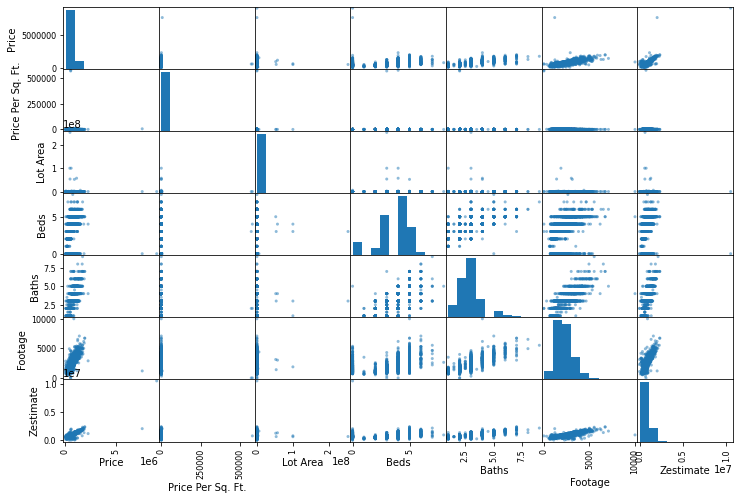

In [21]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
# Decrease the number of numerical attributes in the for loop below to get a clear picture in the matrices

from pandas.plotting import scatter_matrix

x = 0
attributes = []
for x in ['Price','Price Per Sq. Ft.','Lot Area','Beds','Baths','Footage','Zestimate' ]:
    attributes.append(x)
scatter_matrix(Central_Jersey_Home_Price[attributes], figsize=(12, 8))

In [22]:
Central_Jersey_Home_Price.describe()

,Zip,Price,Price Per Sq. Ft.,Footage,Lot Area,Beds,Baths,Zestimate
count,3297.000000,3.297000e+03,2471.000000,2471.000000,3.206000e+03,3297.000000,2999.000000,3.215000e+03
mean,8766.146194,6.803215e+05,780.965601,2275.374747,2.138877e+05,3.498938,2.846132,8.151964e+05
std,114.027097,3.349317e+05,16304.603096,980.940731,5.381420e+06,1.401526,1.090035,3.518755e+05
min,8536.000000,7.500000e+04,28.000000,1.000000,2.500000e-01,0.000000,1.000000,2.100000e+03
25%,8816.000000,4.800000e+05,269.000000,1521.500000,7.019000e+01,3.000000,2.000000,5.933500e+05
50%,8817.000000,6.350000e+05,309.000000,2176.000000,1.089000e+04,4.000000,3.000000,7.619000e+05
75%,8820.000000,8.210000e+05,354.000000,2800.000000,2.003760e+04,4.000000,3.000000,9.660500e+05
max,8852.000000,9.000000e+06,577000.000000,10000.000000,2.530836e+08,8.000000,9.000000,1.049620e+07


# Prepare the data for Machine Learning algorithms

In [23]:
# Let’s revert to a clean training set

x = 0
for x in ['Price', ]:
    Central_Jersey_Home_Price = train_set.drop(x, axis=1) # drop label for training set
    Central_Jersey_Home_Price_labels = train_set[x].copy()

# Note drop() creates a copy of the data and does not affect train_set

In [24]:
# Let’s experiment with sample dataset for data cleaning

sample_incomplete_rows = Central_Jersey_Home_Price[Central_Jersey_Home_Price.isnull().any(axis=1)].head()
sample_incomplete_rows

,Last Date Sold,Zip,Price Per Sq. Ft.,Footage,Lot Area,Beds,Baths,Address,Zestimate
324,2021-09-14,8840,NaN,NaN,33545.56,5,5.0,"31 Woodbridge Ave, Metuchen Boro, NJ 08840-2130",1512100.0
1880,2022-09-20,8820,NaN,NaN,15851.48,4,2.0,"29 Sandalwood Dr, Edison, NJ 08820",680000.0
3687,2024-01-12,8816,NaN,NaN,0.27,4,4.0,"7 Hawk Ct UNIT 7, East Brunswick Twp., NJ 0881...",920300.0
3718,2024-01-26,8536,254.0,3550.0,4.51,0,NaN,"118 Dey Rd, Plainsboro, NJ 08536",1120000.0
1237,2022-05-27,8820,NaN,NaN,87120.00,4,3.0,"16 Ten Eyck Pl, Edison, NJ 08820",933300.0


In [25]:
# Let's use Scikit-Learn Imputer class to fill missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [27]:
# Remove the text attributes because Imputer works on numerical attributes

Central_Jersey_Home_Price_num = Central_Jersey_Home_Price
for x in ['Zip' ]:
    Central_Jersey_Home_Price_num = Central_Jersey_Home_Price_num.drop(x, axis=1)

Now let's preprocess the categorical fields

In [28]:
# Convert categorical fields to numbers
cat_variables = []
for x in ['Zip' ]:
    cat_variables.append(x)
Central_Jersey_Home_Price_cat = Central_Jersey_Home_Price[cat_variables]

In [29]:
Central_Jersey_Home_Price_cat.head(10)

,Zip
1146,8540
2984,8550
3888,8817
2825,8816
1921,8820
324,8840
1356,8820
1395,8550
468,8840
561,8540


In [30]:
# Definition of the CategoricalEncoder class

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [31]:
from sklearn.pipeline import Pipeline
cat_attribs = list(Central_Jersey_Home_Price_cat)
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
])


## Feature scaling

In [32]:
# Use Scikit-Learn standard_scaling
num_variables_standardization = []
for x in ['Price Per Sq. Ft.','Lot Area','Beds','Baths','Footage','Zestimate' ]:
    num_variables_standardization.append(x)
Central_Jersey_Home_Price_num_standardization = Central_Jersey_Home_Price_num[num_variables_standardization]
Central_Jersey_Home_Price_num_standardization.head()


,Price Per Sq. Ft.,Lot Area,Beds,Baths,Footage,Zestimate
1146,265.0,13198.68,3,2.05,2228.0,740800.0
2984,371.0,0.70,4,3.00,2560.0,1024600.0
3888,264.0,9121.00,3,2.00,1840.0,567100.0
2825,285.0,0.42,4,3.00,2506.0,812100.0
1921,343.0,14849.60,4,3.00,2511.0,1001400.0


In [33]:
# Building a pipeline for preprocessing the numerical attributes for StandardScaler:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_attribs_standard = list(Central_Jersey_Home_Price_num_standardization)
num_pipeline_standard = Pipeline([
    ('selector', DataFrameSelector(num_attribs_standard)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])


In [34]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline_standard", num_pipeline_standard),
    ("cat_pipeline", cat_pipeline),
])


In [35]:
Central_Jersey_Home_Price.head()

,Last Date Sold,Zip,Price Per Sq. Ft.,Footage,Lot Area,Beds,Baths,Address,Zestimate
1146,2022-05-09,8540,265.0,2228.0,13198.68,3,2.05,"14 Heath Ct, Princeton, NJ 08540",740800.0
2984,2023-07-17,8550,371.0,2560.0,0.70,4,3.00,"12 Springhill Dr, West Windsor, NJ 08550",1024600.0
3888,2024-03-28,8817,264.0,1840.0,9121.00,3,2.00,"35 Cambridge Rd, Edison, NJ 08817",567100.0
2825,2023-06-12,8816,285.0,2506.0,0.42,4,3.00,"333 Dunhams Corner Rd, East Brunswick, NJ 08816",812100.0
1921,2022-09-27,8820,343.0,2511.0,14849.60,4,3.00,"12 Alexis Ln, Edison, NJ 08820",1001400.0


In [36]:
Central_Jersey_Home_Price_prepared = full_pipeline.fit_transform(Central_Jersey_Home_Price)
print(Central_Jersey_Home_Price_prepared[0])
print(Central_Jersey_Home_Price_prepared[1])
print(Central_Jersey_Home_Price_prepared[2])

[-0.02817972 -0.03676769 -0.35605068 -0.77860764 -0.02644077 -0.21026552
  0.          1.          0.          0.          0.          0.
  0.          0.        ]
[-0.02066935 -0.0392551   0.35756579  0.13452971  0.36408391  0.60638449
  0.          0.          1.          0.          0.          0.
  0.          0.        ]
[-0.02825057 -0.0375362  -0.35605068 -0.8266675  -0.48283708 -0.71009676
  0.          0.          0.          0.          1.          0.
  0.          0.        ]


In [37]:
Central_Jersey_Home_Price_prepared.shape

(3297, 14)

# Select and train a model 

In [38]:
# Function to display scores of our alogorithms for cross-validation

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [39]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Central_Jersey_Home_Price_prepared, Central_Jersey_Home_Price_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# Calculate the RMSE in Linear Regression Model

from sklearn.metrics import mean_squared_error

Central_Jersey_Home_Price_predictions = lin_reg.predict(Central_Jersey_Home_Price_prepared)
lin_mse = mean_squared_error(Central_Jersey_Home_Price_labels, Central_Jersey_Home_Price_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

165458.60313285427

In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming Central_Jersey_Home_Price_prepared and Central_Jersey_Home_Price_labels are already defined
lin_reg = LinearRegression()
lin_reg.fit(Central_Jersey_Home_Price_prepared, Central_Jersey_Home_Price_labels)

# Predicting the labels
Central_Jersey_Home_Price_predictions = lin_reg.predict(Central_Jersey_Home_Price_prepared)

# Calculating mean squared error and root mean squared error
lin_mse = mean_squared_error(Central_Jersey_Home_Price_labels, Central_Jersey_Home_Price_predictions)
lin_rmse = np.sqrt(lin_mse)

# Calculating R² value
lin_r2 = r2_score(Central_Jersey_Home_Price_labels, Central_Jersey_Home_Price_predictions)

# Getting the linear regression equation
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_

# Displaying the results
print(f"Root Mean Squared Error (RMSE): {lin_rmse}")
print(f"R² value: {lin_r2}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

# Printing the linear regression equation
equation = "y = " + str(intercept)
for i, coef in enumerate(coefficients):
    equation += f" + ({coef} * x_{i})"
print("Linear Regression Equation:")
print(equation)

Root Mean Squared Error (RMSE): 165458.60313285427
R² value: 0.7558830637214023
Intercept: 680906.7574705508
Coefficients: [   730.96729841   -458.34317643  18605.91639825   2203.99301123
  13840.76882769 271920.93775968  10535.73892549  -6239.22361537
  18552.98184806   2949.72945887  -3559.43581597  -8775.361103
 -12171.75889758  -1292.67080051]
Linear Regression Equation:
y = 680906.7574705508 + (730.9672984117257 * x_0) + (-458.3431764289562 * x_1) + (18605.91639825253 * x_2) + (2203.9930112336497 * x_3) + (13840.76882769122 * x_4) + (271920.9377596848 * x_5) + (10535.738925493923 * x_6) + (-6239.22361537305 * x_7) + (18552.98184806371 * x_8) + (2949.7294588730006 * x_9) + (-3559.4358159741323 * x_10) + (-8775.361102999726 * x_11) + (-12171.758897578151 * x_12) + (-1292.6708005056119 * x_13)


In [98]:
# K-fold Cross Validation for Linear Regression
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, Central_Jersey_Home_Price_prepared, Central_Jersey_Home_Price_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 90094.70538953 154022.95311434  99396.72527986 132357.73741075
 127031.46794096 115391.25414649 171249.71509151 119694.44126434
 357062.90719064 150010.42240683]
Mean: 151631.23292352477
Standard deviation: 72402.00534957933


In [99]:
# Train a model using Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(Central_Jersey_Home_Price_prepared, Central_Jersey_Home_Price_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [100]:
# Calculate RMSE in Decision Tree model
from sklearn.metrics import mean_squared_error

Central_Jersey_Home_Price_predictions = tree_reg.predict(Central_Jersey_Home_Price_prepared)
tree_mse = mean_squared_error(Central_Jersey_Home_Price_labels, Central_Jersey_Home_Price_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

3373.4842996354323

In [101]:
# K-fold Cross Validation for Decision Tree Model
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg, Central_Jersey_Home_Price_prepared, Central_Jersey_Home_Price_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [102]:
display_scores(tree_rmse_scores)

Scores: [ 78091.84794198 416197.32060126  76171.45913607  89537.41464941
  83421.02600798 105412.20053603 133901.41932813 101346.99527033
 327037.74146823 114627.04162738]
Mean: 152574.44665668008
Standard deviation: 112566.6978467113


In [103]:
# Train a model using Random Forests

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(Central_Jersey_Home_Price_prepared, Central_Jersey_Home_Price_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [104]:
# Calculate RMSE in Random Forest model
from sklearn.metrics import mean_squared_error

Central_Jersey_Home_Price_predictions = forest_reg.predict(Central_Jersey_Home_Price_prepared)
forest_mse = mean_squared_error(Central_Jersey_Home_Price_labels, Central_Jersey_Home_Price_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

61284.097956222984

In [105]:
# Cross Validation in Random Forest model

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, Central_Jersey_Home_Price_prepared, Central_Jersey_Home_Price_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 63879.58312247 406459.7689269   57943.0598547   73255.40113136
  64470.83026184  73005.81122272 114076.39997042  76595.527712
 329846.1781729  112353.60525471]
Mean: 137188.61656300252
Standard deviation: 118150.4134242357


In [106]:
# Total attributes

attributes = num_attribs_standard + cat_attribs

## Fine-tune the Model

In [57]:
# GridSearchCV
'''
from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

#param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10, 30], 'max_features': [6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [20, 35], 'max_features': [7, 9]},
]

algo = RandomForestRegressor(random_state=42)
# train across 10 folds
grid_search = GridSearchCV(algo, param_grid, cv=10,
                           scoring='neg_mean_squared_error')
grid_search.fit(Central_Jersey_Home_Price_prepared, Central_Jersey_Home_Price_labels) 
'''

ValueError: Invalid parameter n_estimators for estimator DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10, 30], 'max_features': [6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [20, 35], 'max_features': [7, 9]},
]

# Define the parameter grid for Decision Tree
param_grid = [
    # try combinations of hyperparameters
    {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20],
     'min_samples_leaf': [1, 5, 10], 'max_features': [None, 'sqrt', 'log2']}
]

# Initialize the Decision Tree Regressor
algo = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(algo, param_grid, cv=10,
                           scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(Central_Jersey_Home_Price_prepared, Central_Jersey_Home_Price_labels)

# Retrieve the best model
final_model = grid_search.best_estimator_

In [108]:


# The best hyperparameter combinations

grid_search.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [109]:
# Get the best estimator

grid_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [110]:
# Let's look at the score of each hyperparameter combination tested during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

189605.44094699633 {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
187191.4641727854 {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
187904.28167335066 {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
194291.94559711448 {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
194291.94559711448 {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
195130.58380239652 {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
190464.51623174694 {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
190464.51623174694 {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 10}
190464.51623174694 {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20}
252039.7093708335 {'

### Analyze the Best Models and Their Errors

In [111]:
# See the importance score of each attribute in GridSearchCV

feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, attributes), reverse=True)

[(0.7678341711837754, 'Zestimate'),
 (0.16015061167440314, 'Price Per Sq. Ft.'),
 (0.029477279110266864, 'Footage'),
 (0.016207981860740454, 'Lot Area'),
 (0.011899010670855675, 'Baths'),
 (0.007411283187549675, 'Beds'),
 (0.00015514234042531908, 'Zip')]

In [60]:
'''
for x in ['Latitude', 'Longitude']:
    Central_Jersey_Home_Price = Central_Jersey_Home_Price.drop(x,axis=1)
Central_Jersey_Home_Price.head()
'''

,Last Date Sold,Zip,Price Per Sq. Ft.,Footage,Lot Area,Beds,Baths,Address,Zestimate
1146,2022-05-09,8540,265.0,2228.0,13198.68,3,2.05,"14 Heath Ct, Princeton, NJ 08540",740800.0
2984,2023-07-17,8550,371.0,2560.0,0.70,4,3.00,"12 Springhill Dr, West Windsor, NJ 08550",1024600.0
3888,2024-03-28,8817,264.0,1840.0,9121.00,3,2.00,"35 Cambridge Rd, Edison, NJ 08817",567100.0
2825,2023-06-12,8816,285.0,2506.0,0.42,4,3.00,"333 Dunhams Corner Rd, East Brunswick, NJ 08816",812100.0
1921,2022-09-27,8820,343.0,2511.0,14849.60,4,3.00,"12 Alexis Ln, Edison, NJ 08820",1001400.0


In [112]:
# Evaluate model on the Test Set

final_model = grid_search.best_estimator_

x = 0
for x in ['Price', ]:
    X_test = test_set.drop(x, axis=1)
    y_test = test_set[x].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [113]:
final_rmse

542429.6344028589

In [114]:
print(grid_search.best_estimator_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')


Congratulations! You already know quite a lot about Machine Learning. :)